# File 3B: Support Vector Machine (SVM) Model
## Stock Price Volatility & Sentiment ML Project

**Purpose:** Train and evaluate SVM model

**What is SVM?**
- Powerful classification algorithm
- Can capture non-linear relationships using kernels
- Works well with high-dimensional data
- Uses RBF (Radial Basis Function) kernel for non-linear patterns

**We'll train:**
- Model with full features (23 features)
- Model with PCA features (7 components)

---

## Step 1: Import Libraries## Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✅ Libraries loaded successfully!')

✅ Libraries loaded successfully!


## Step 2: Load Preprocessed Data

In [2]:
print('='*70)
print('LOADING PREPROCESSED DATA')
print('='*70)

# UPDATE THIS PATH
processed_dir = '/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/data/processed'

# Load training and testing data
X_train = np.load(f'{processed_dir}/X_train_scaled.npy')
X_test = np.load(f'{processed_dir}/X_test_scaled.npy')
X_train_pca = np.load(f'{processed_dir}/X_train_pca.npy')
X_test_pca = np.load(f'{processed_dir}/X_test_pca.npy')
y_train = np.load(f'{processed_dir}/y_train.npy')
y_test = np.load(f'{processed_dir}/y_test.npy')

print('\n✅ Data loaded successfully!')
print(f'\nData shapes:')
print(f'   X_train (full): {X_train.shape}')
print(f'   X_test (full): {X_test.shape}')
print(f'   X_train (PCA): {X_train_pca.shape}')
print(f'   X_test (PCA): {X_test_pca.shape}')
print(f'   y_train: {y_train.shape}')
print(f'   y_test: {y_test.shape}')

print(f'\nTarget distribution:')
print(f'   Train - Up: {y_train.sum()}/{len(y_train)} ({y_train.mean()*100:.1f}%)')
print(f'   Test - Up: {y_test.sum()}/{len(y_test)} ({y_test.mean()*100:.1f}%)')

LOADING PREPROCESSED DATA

✅ Data loaded successfully!

Data shapes:
   X_train (full): (2964, 23)
   X_test (full): (741, 23)
   X_train (PCA): (2964, 7)
   X_test (PCA): (741, 7)
   y_train: (2964,)
   y_test: (741,)

Target distribution:
   Train - Up: 1547/2964 (52.2%)
   Test - Up: 388/741 (52.4%)


## Step 3: Train SVM with Full Features

**SVM Hyperparameters:**
- **Kernel:** RBF (Radial Basis Function) - captures non-linear patterns
- **C:** 1.0 - regularization parameter (controls margin)
- **Gamma:** 'scale' - kernel coefficient (auto-calculated)
- **Probability:** True - enables probability predictions for ROC curve

In [3]:
print('\n' + '='*70)
print('TRAINING SVM - FULL FEATURES')
print('='*70)

print('\nTraining with 23 features...')
print('Hyperparameters:')
print('   - Kernel: RBF (Radial Basis Function)')
print('   - C: 1.0')
print('   - Gamma: scale')
print('   - Random state: 42')

# Create and train model
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42,
    probability=True  # For ROC curve
)

print('\n⏳ Training SVM... (this may take a minute)')
svm_model.fit(X_train, y_train)

print('✅ Model trained successfully!')
print(f'   Support vectors: {svm_model.n_support_}')


TRAINING SVM - FULL FEATURES

Training with 23 features...
Hyperparameters:
   - Kernel: RBF (Radial Basis Function)
   - C: 1.0
   - Gamma: scale
   - Random state: 42

⏳ Training SVM... (this may take a minute)
✅ Model trained successfully!
   Support vectors: [1403 1431]


## Step 4: Evaluate Full Features Model

In [4]:
# Make predictions
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('='*70)
print('RESULTS - FULL FEATURES MODEL')
print('='*70)
print(f'\n📊 Training Accuracy: {train_acc*100:.2f}%')
print(f'📊 Testing Accuracy: {test_acc*100:.2f}%')

# Check overfitting
diff = train_acc - test_acc
if diff > 0.05:
    print(f'\n⚠️  Overfitting detected! Difference: {diff*100:.2f}%')
elif diff < -0.05:
    print(f'\n⚠️  Underfitting detected! Difference: {diff*100:.2f}%')
else:
    print(f'\n✅ Good fit! Difference: {diff*100:.2f}%')

# Check target achievement
if test_acc >= 0.55:
    print(f'✅ Target accuracy (55%) ACHIEVED!')
else:
    print(f'⚠️  Below target accuracy (55%)')

RESULTS - FULL FEATURES MODEL

📊 Training Accuracy: 58.64%
📊 Testing Accuracy: 50.20%

⚠️  Overfitting detected! Difference: 8.43%
⚠️  Below target accuracy (55%)


In [5]:
# Detailed classification report
print('\n' + '='*70)
print('DETAILED CLASSIFICATION REPORT')
print('='*70)
print(classification_report(y_test, y_pred_test, 
                          target_names=['Down (0)', 'Up (1)'],
                          digits=4))


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Down (0)     0.4758    0.4448    0.4597       353
      Up (1)     0.5231    0.5541    0.5382       388

    accuracy                         0.5020       741
   macro avg     0.4994    0.4994    0.4990       741
weighted avg     0.5006    0.5020    0.5008       741



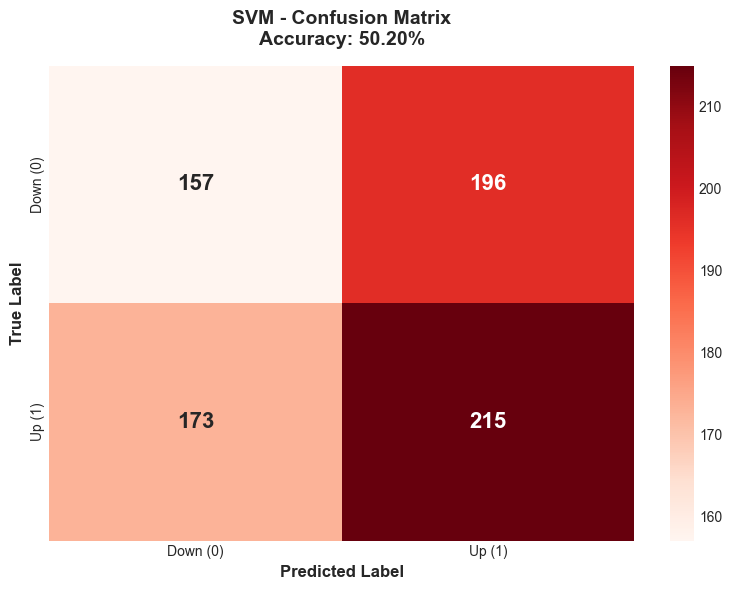

✅ Saved: 03B_svm_confusion_matrix.png


In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Down (0)', 'Up (1)'],
            yticklabels=['Down (0)', 'Up (1)'],
            annot_kws={'size': 16, 'weight': 'bold'})

plt.title(f'SVM - Confusion Matrix\nAccuracy: {test_acc*100:.2f}%',
         fontsize=14, fontweight='bold', pad=15)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03B_svm_confusion_matrix.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03B_svm_confusion_matrix.png')

## Step 5: Train SVM with PCA Features

In [7]:
print('\n' + '='*70)
print('TRAINING SVM - PCA FEATURES')
print('='*70)

print('\nTraining with 7 PCA components...')

# Create and train model with PCA features
svm_model_pca = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42,
    probability=True
)

print('\n⏳ Training SVM with PCA...')
svm_model_pca.fit(X_train_pca, y_train)

print('✅ PCA model trained successfully!')
print(f'   Support vectors: {svm_model_pca.n_support_}')


TRAINING SVM - PCA FEATURES

Training with 7 PCA components...

⏳ Training SVM with PCA...
✅ PCA model trained successfully!
   Support vectors: [1403 1428]


In [8]:
# Evaluate PCA model
y_pred_pca_test = svm_model_pca.predict(X_test_pca)
test_acc_pca = accuracy_score(y_test, y_pred_pca_test)

print('='*70)
print('RESULTS - PCA MODEL')
print('='*70)
print(f'\n📊 Testing Accuracy (PCA): {test_acc_pca*100:.2f}%')

# Compare with full features
print(f'\n🔄 Comparison:')
print(f'   Full features (23): {test_acc*100:.2f}%')
print(f'   PCA features (7): {test_acc_pca*100:.2f}%')
print(f'   Difference: {(test_acc - test_acc_pca)*100:.2f}%')

if test_acc_pca >= test_acc * 0.95:
    print(f'\n✅ PCA maintains good performance with fewer features!')
else:
    print(f'\n⚠️  PCA significantly reduces performance')

RESULTS - PCA MODEL

📊 Testing Accuracy (PCA): 50.47%

🔄 Comparison:
   Full features (23): 50.20%
   PCA features (7): 50.47%
   Difference: -0.27%

✅ PCA maintains good performance with fewer features!


## Step 6: Decision Boundary Analysis

SVM creates a decision boundary (hyperplane) to separate classes. Let's analyze it.

SVM DECISION BOUNDARY ANALYSIS

Decision function statistics:
   Min: -1.4673
   Max: 1.5974
   Mean: 0.0876
   Std: 0.6853


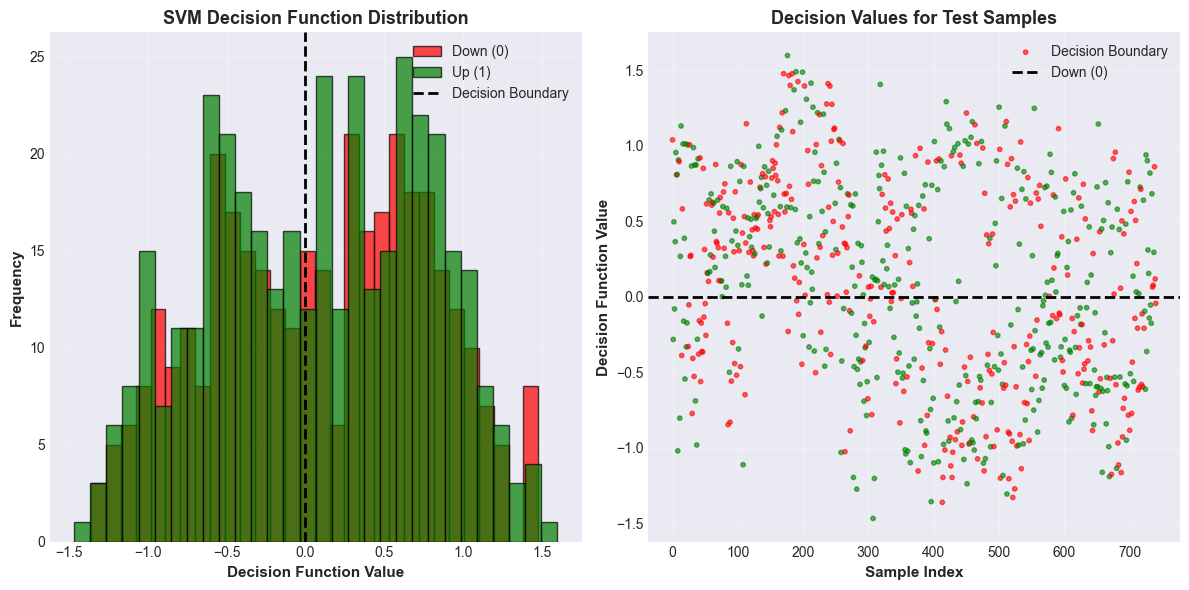


✅ Saved: 03B_svm_decision_boundary.png


In [9]:
print('='*70)
print('SVM DECISION BOUNDARY ANALYSIS')
print('='*70)

# Get decision function values
decision_values = svm_model.decision_function(X_test)

print(f'\nDecision function statistics:')
print(f'   Min: {decision_values.min():.4f}')
print(f'   Max: {decision_values.max():.4f}')
print(f'   Mean: {decision_values.mean():.4f}')
print(f'   Std: {decision_values.std():.4f}')

# Visualize decision function distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(decision_values[y_test == 0], bins=30, alpha=0.7, label='Down (0)', color='red', edgecolor='black')
plt.hist(decision_values[y_test == 1], bins=30, alpha=0.7, label='Up (1)', color='green', edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Decision Boundary')
plt.xlabel('Decision Function Value', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('SVM Decision Function Distribution', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
colors = ['red' if y == 0 else 'green' for y in y_test]
plt.scatter(range(len(decision_values)), decision_values, c=colors, alpha=0.6, s=10)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Decision Boundary')
plt.xlabel('Sample Index', fontsize=11, fontweight='bold')
plt.ylabel('Decision Function Value', fontsize=11, fontweight='bold')
plt.title('Decision Values for Test Samples', fontsize=13, fontweight='bold')
plt.legend(['Decision Boundary', 'Down (0)', 'Up (1)'])
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03B_svm_decision_boundary.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Saved: 03B_svm_decision_boundary.png')

## Step 7: ROC Curve

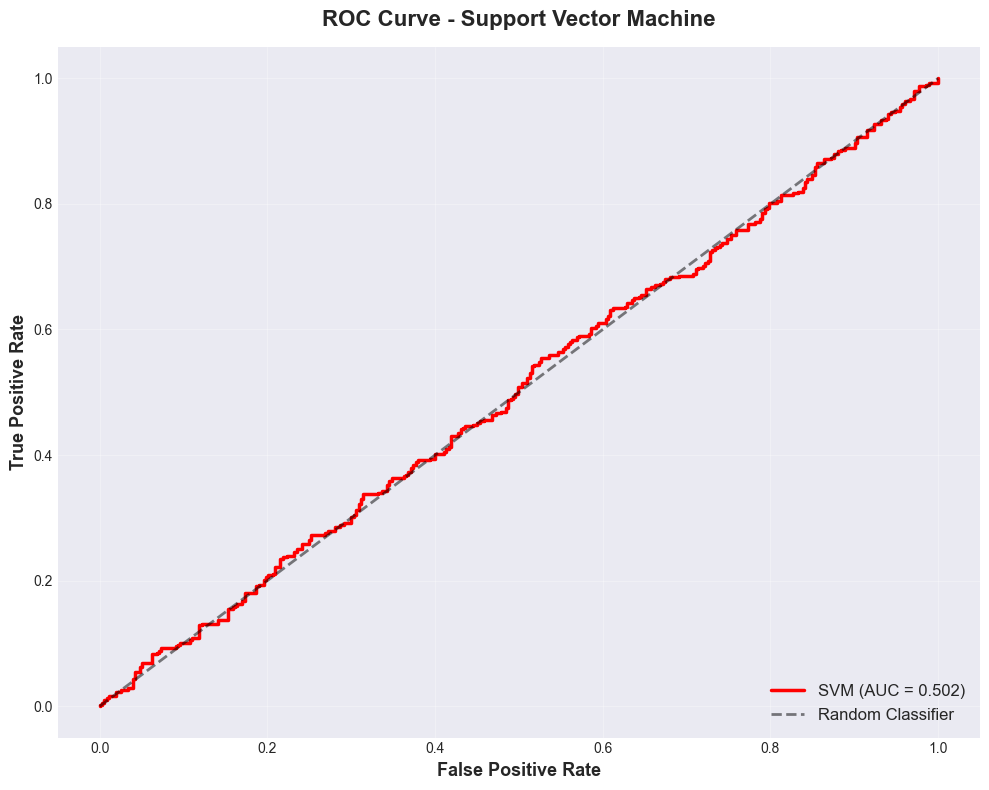

✅ Saved: 03B_svm_roc_curve.png

📊 AUC Score: 0.5024


In [10]:
# Calculate ROC curve
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', linewidth=2.5, label=f'SVM (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('ROC Curve - Support Vector Machine', fontsize=16, fontweight='bold', pad=15)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03B_svm_roc_curve.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03B_svm_roc_curve.png')
print(f'\n📊 AUC Score: {roc_auc:.4f}')

## Step 8: Prediction Confidence Analysis

Let's see how confident the SVM is about its predictions.

PREDICTION CONFIDENCE ANALYSIS

Confidence statistics:
   Min confidence: 0.5101
   Max confidence: 0.5402
   Mean confidence: 0.5250
   Std confidence: 0.0067

High confidence predictions (>60%): 0/741 (0.0%)


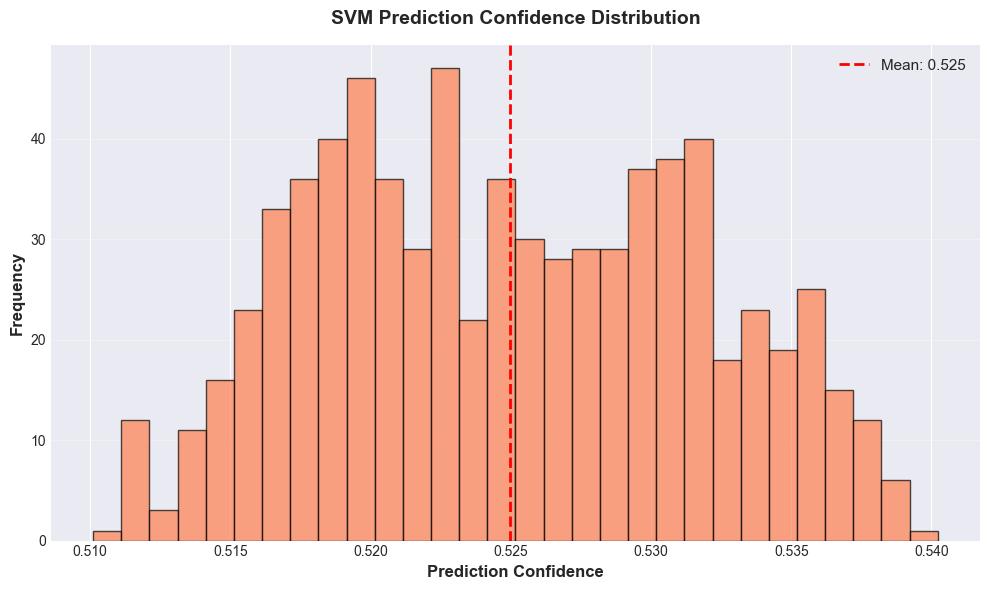


✅ Saved: 03B_svm_confidence.png


In [11]:
print('='*70)
print('PREDICTION CONFIDENCE ANALYSIS')
print('='*70)

# Get prediction probabilities
y_pred_proba_all = svm_model.predict_proba(X_test)
max_proba = y_pred_proba_all.max(axis=1)

print(f'\nConfidence statistics:')
print(f'   Min confidence: {max_proba.min():.4f}')
print(f'   Max confidence: {max_proba.max():.4f}')
print(f'   Mean confidence: {max_proba.mean():.4f}')
print(f'   Std confidence: {max_proba.std():.4f}')

# Count high confidence predictions
high_conf = (max_proba > 0.6).sum()
print(f'\nHigh confidence predictions (>60%): {high_conf}/{len(max_proba)} ({high_conf/len(max_proba)*100:.1f}%)')

# Visualize confidence distribution
plt.figure(figsize=(10, 6))
plt.hist(max_proba, bins=30, color='coral', alpha=0.7, edgecolor='black')
plt.axvline(x=max_proba.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {max_proba.mean():.3f}')
plt.xlabel('Prediction Confidence', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('SVM Prediction Confidence Distribution', fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11)
plt.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03B_svm_confidence.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Saved: 03B_svm_confidence.png')

## Step 9: Save Models

In [12]:
print('='*70)
print('SAVING MODELS')
print('='*70)

# Create models directory
import os
models_dir = '/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/models'
os.makedirs(models_dir, exist_ok=True)

# Save both models
joblib.dump(svm_model, f'{models_dir}/svm.pkl')
joblib.dump(svm_model_pca, f'{models_dir}/svm_pca.pkl')

print('\n✅ Models saved successfully!')
print(f'   - svm.pkl')
print(f'   - svm_pca.pkl')
print(f'\nLocation: {models_dir}')

SAVING MODELS

✅ Models saved successfully!
   - svm.pkl
   - svm_pca.pkl

Location: /Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/models
